In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score

In [3]:
from sklearn.svm import SVC

In [4]:
import warnings
warnings.filterwarnings("ignore")

from scipy import stats

In [5]:
Data = pd.read_csv(r'C:\Users\banga\OneDrive\Desktop\Project_Jan2024\Final_Data.csv')

In [6]:
Data

,Unnamed: 0,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,ID,h1n1_vaccine,seasonal_vaccine
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,train,0.0,0.0
1,1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,train,0.0,1.0
2,2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,train,0.0,0.0
3,3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,train,0.0,1.0
4,4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,train,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,53410,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN,test,NaN,NaN
53411,53411,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov,test,NaN,NaN
53412,53412,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN,test,NaN,NaN
53413,53413,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN,test,NaN,NaN


In [8]:
df = Data.copy()

In [9]:
df.describe()

,Unnamed: 0,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,53415.000000,53415.000000,53238.000000,53177.000000,53265.000000,52994.000000,53377.000000,53333.000000,53256.000000,53251.000000,...,52626.000000,52647.000000,52645.000000,52501.000000,52402.000000,52357.000000,52941.000000,52941.000000,26707.000000,26707.000000
mean,26707.000000,26707.000000,1.620816,1.264287,0.049244,0.727705,0.069131,0.825849,0.355077,0.337271,...,3.847623,2.334701,2.359141,4.025409,2.713923,2.130756,0.890406,0.539166,0.212454,0.465608
std,15419.726651,15419.726651,0.906534,0.616881,0.216380,0.445145,0.253679,0.379243,0.478541,0.472783,...,1.007498,1.280608,1.361078,1.084875,1.380553,1.336077,0.753836,0.931626,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13353.500000,13353.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,26707.000000,26707.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,40060.500000,40060.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,53414.000000,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [10]:
df['education'].value_counts()

education
College Graduate    20283
Some College        14123
12 Years            11496
< 12 Years           4699
Name: count, dtype: int64

<Axes: xlabel='education'>

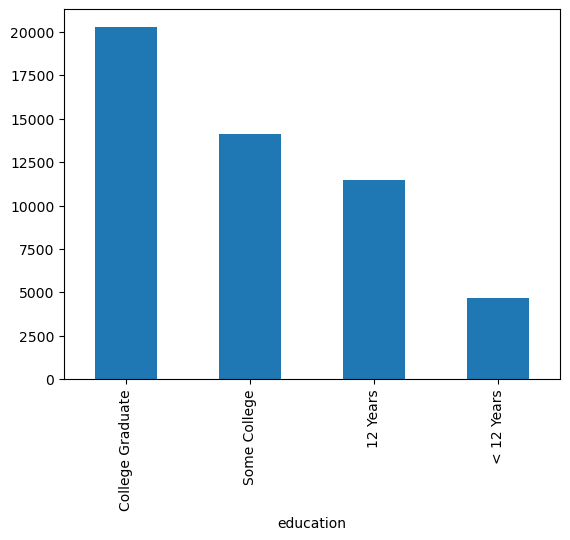

In [11]:

df['education'].value_counts().plot(kind="bar")

In [12]:
df["health_insurance"].value_counts()

health_insurance
1.0    25554
0.0     3359
Name: count, dtype: int64

<Axes: ylabel='count'>

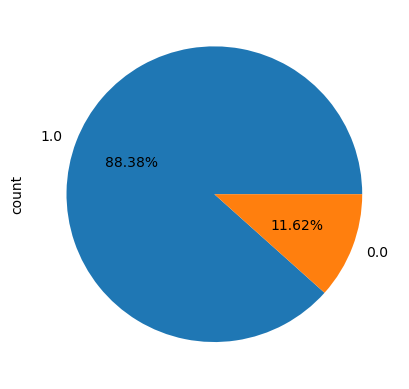

In [13]:
df["health_insurance"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [14]:
df["doctor_recc_seasonal"].value_counts()

doctor_recc_seasonal
0.0    32813
1.0    16282
Name: count, dtype: int64

<Axes: ylabel='count'>

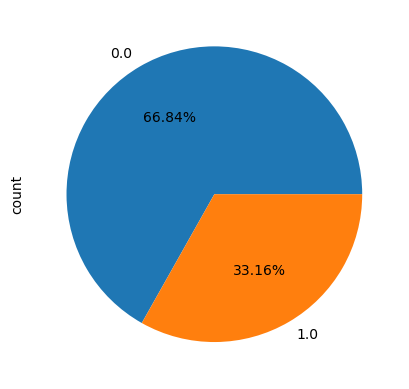

In [15]:
df["doctor_recc_seasonal"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [16]:
df["opinion_seas_vacc_effective"].value_counts()

opinion_seas_vacc_effective
4.0    23131
5.0    19970
2.0     4490
3.0     2537
1.0     2373
Name: count, dtype: int64

<Axes: xlabel='opinion_seas_vacc_effective'>

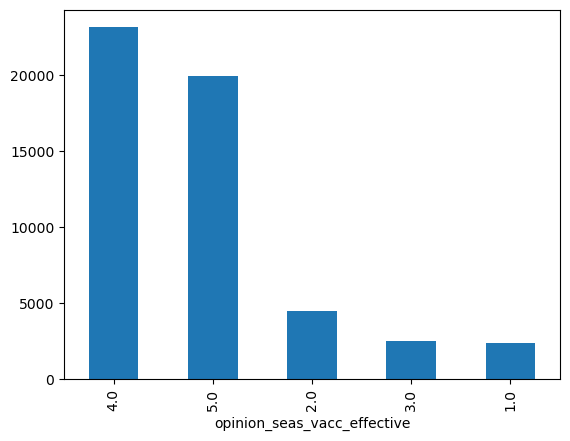

In [17]:
df["opinion_seas_vacc_effective"].value_counts().plot(kind="bar")

In [18]:
df["opinion_seas_risk"].value_counts()

opinion_seas_risk
2.0    18026
4.0    15239
1.0    11913
5.0     5811
3.0     1413
Name: count, dtype: int64

<Axes: ylabel='count'>

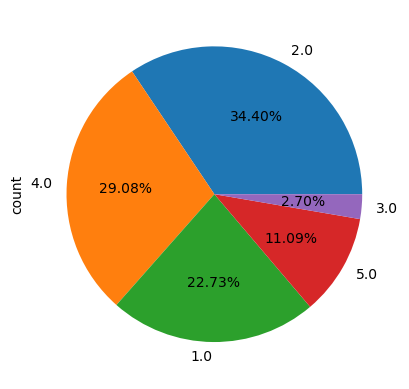

In [19]:
df["opinion_seas_risk"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [20]:
df.columns

Index(['Unnamed: 0', 'respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'ID', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

<Axes: xlabel='seasonal_vaccine'>

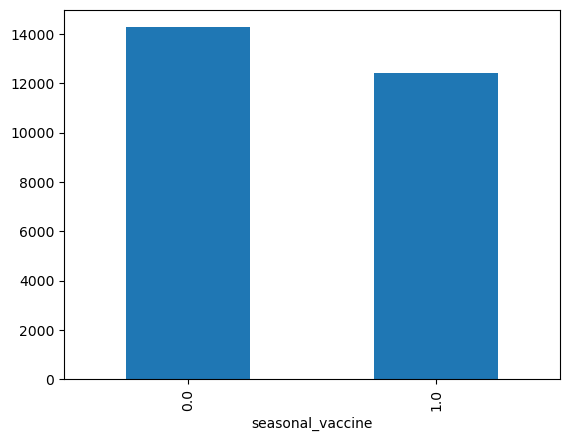

In [21]:
df['seasonal_vaccine'].value_counts().plot(kind="bar")

In [22]:
df_numeric = df.select_dtypes(include='number')

In [23]:
df_numeric.dtypes

Unnamed: 0                       int64
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
h1n1_vaccine             

In [24]:
corr=df_numeric.corr()

In [25]:
corr

,Unnamed: 0,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
Unnamed: 0,1.000000,1.000000,0.008423,0.001896,-0.000525,0.008703,0.002544,0.004174,-0.000454,0.006487,...,-0.000442,-0.003781,0.002076,0.000084,-0.003264,0.013769,0.004764,0.003790,-0.003280,-0.004652
respondent_id,1.000000,1.000000,0.008423,0.001896,-0.000525,0.008703,0.002544,0.004174,-0.000454,0.006487,...,-0.000442,-0.003781,0.002076,0.000084,-0.003264,0.013769,0.004764,0.003790,-0.003280,-0.004652
h1n1_concern,0.008423,0.008423,1.000000,0.065403,0.095292,0.226497,0.148944,0.288596,0.257210,0.246377,...,0.229516,0.370337,0.357582,0.224678,0.324177,0.224063,-0.007645,0.050870,0.121929,0.154828
h1n1_knowledge,0.001896,0.001896,0.065403,1.000000,-0.008421,0.085347,0.023169,0.085805,-0.051018,-0.067909,...,0.123079,0.081321,-0.012861,0.087927,0.081169,-0.052468,0.030392,0.056299,0.117951,0.120152
behavioral_antiviral_meds,-0.000525,-0.000525,0.095292,-0.008421,1.000000,0.054685,0.150775,0.066006,0.111762,0.131144,...,0.035136,0.107501,0.086454,0.015435,0.090612,0.091575,0.044884,0.089856,0.040608,0.006277
behavioral_avoidance,0.008703,0.008703,0.226497,0.085347,0.054685,1.000000,0.067723,0.331156,0.228931,0.225790,...,0.110999,0.118846,0.129770,0.119419,0.129455,0.079062,0.022568,0.043452,0.047690,0.076395
behavioral_face_mask,0.002544,0.002544,0.148944,0.023169,0.150775,0.067723,1.000000,0.084386,0.169001,0.162385,...,0.037551,0.129705,0.109483,0.038002,0.107525,0.087846,0.012011,0.012852,0.070498,0.050083
behavioral_wash_hands,0.004174,0.004174,0.288596,0.085805,0.066006,0.331156,0.084386,1.000000,0.192258,0.192615,...,0.134188,0.169155,0.151027,0.134547,0.171300,0.090468,0.022882,0.048658,0.074712,0.112414
behavioral_large_gatherings,-0.000454,-0.000454,0.257210,-0.051018,0.111762,0.228931,0.169001,0.192258,1.000000,0.588650,...,0.050413,0.135405,0.184770,0.079144,0.132614,0.140079,-0.024629,-0.002665,0.017822,0.064025
behavioral_outside_home,0.006487,0.006487,0.246377,-0.067909,0.131144,0.225790,0.162385,0.192615,0.588650,1.000000,...,0.045203,0.126417,0.172983,0.067537,0.119871,0.140066,-0.025525,-0.002818,0.021768,0.053509


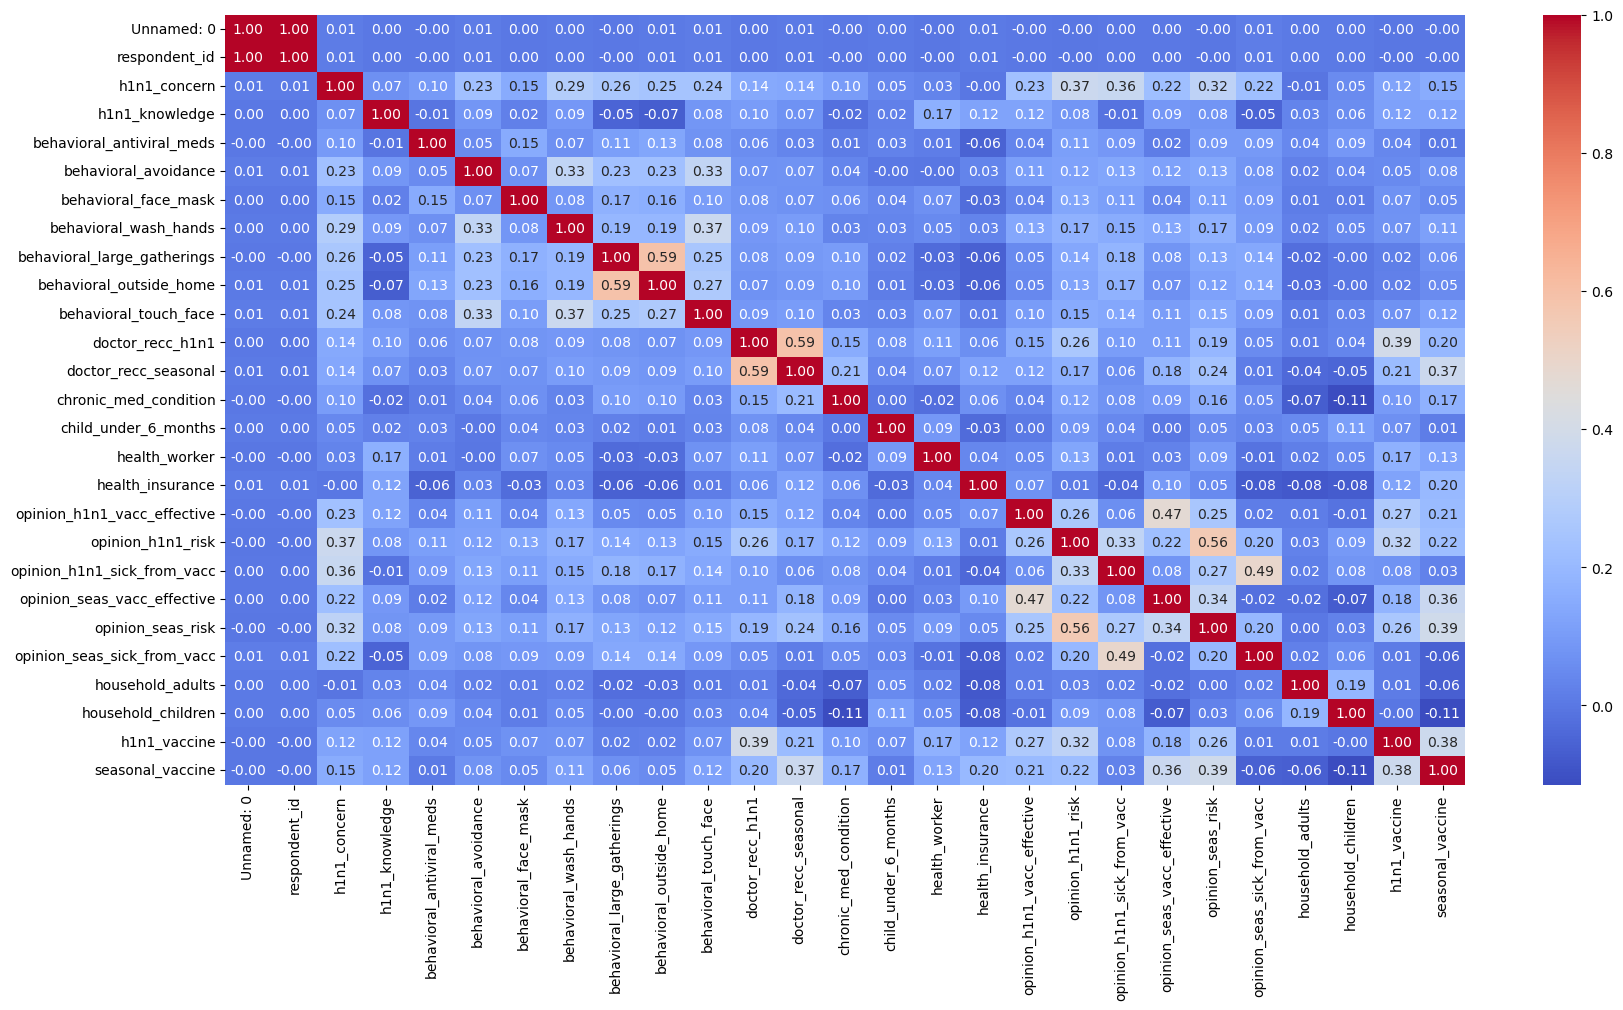

In [26]:

plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [42]:
df_encoded = pd.get_dummies(df['education'], prefix='education')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)



In [43]:
df_encoded

,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
53410,0,0,0,0
53411,1,0,0,0
53412,0,0,0,1
53413,0,0,0,1


In [44]:
df['age_group'].value_counts()

age_group
65+ Years        13561
55 - 64 Years    11092
45 - 54 Years    10495
18 - 34 Years    10449
35 - 44 Years     7818
Name: count, dtype: int64

In [45]:
df_encoded = pd.get_dummies(df['age_group'], prefix='Age')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [46]:
df_encoded

,Age_18 - 34 Years,Age_35 - 44 Years,Age_45 - 54 Years,Age_55 - 64 Years,Age_65+ Years
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
53410,0,1,0,0,0
53411,1,0,0,0,0
53412,1,0,0,0,0
53413,0,0,0,1,0


In [47]:
df_encoded = pd.get_dummies(df['race'], prefix='Race')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [48]:
df_encoded = pd.get_dummies(df['sex'], prefix='Gender')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [49]:
df['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    25552
> $75,000                    13673
Below Poverty                 5270
Name: count, dtype: int64

In [50]:
df_encoded = pd.get_dummies(df['income_poverty'], prefix='Income')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [51]:
df['marital_status'].value_counts()

marital_status
Married        27103
Not Married    23462
Name: count, dtype: int64

In [52]:
df_encoded = pd.get_dummies(df['marital_status'], prefix='Status')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [53]:
df_encoded = pd.get_dummies(df['rent_or_own'], prefix='House')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [54]:
df_encoded = pd.get_dummies(df['employment_status'], prefix='EmpStatus')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [55]:
df['hhs_geo_region'].value_counts()

hhs_geo_region
lzgpxyit    8660
fpwskwrf    6506
qufhixun    6166
oxchjgsf    5846
bhuqouqj    5713
kbazzjca    5702
mlyzmhmf    4426
lrircsnp    4100
atmpeygn    4019
dqpwygqj    2277
Name: count, dtype: int64

In [56]:
df_encoded = pd.get_dummies(df['census_msa'], prefix='EmpStatus')
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)

In [57]:
df['employment_industry'].value_counts()    # So many sub categories hence, ignored

employment_industry
fcxhlnwr    4952
wxleyezf    3609
ldnlellj    2455
pxcmvdjn    2115
arjwrbjb    1756
atmlpfrs    1748
xicduogh    1698
mfikgejo    1263
vjjrobsf    1094
rucpziij    1061
xqicxuve    1038
saaquncn     676
cfqqtusy     629
nduyfdeo     578
mcubkhph     537
wlfvacwt     427
dotnnunm     421
haxffmxo     308
msuufmds     256
phxvnwax     170
qnlwzans      19
Name: count, dtype: int64

In [58]:
df['employment_occupation'].value_counts()    # Here, also somany sub categories, ignored

employment_occupation
xtkaffoo    3526
mxkfnird    3070
emcorrxb    2554
cmhcxjea    2471
xgwztkwe    2220
hfxkjkmi    1491
qxajmpny    1047
xqwwgdyp     960
uqqtjvyb     953
kldqjyjy     915
tfqavkke     790
ccgxvspp     709
ukymxvdu     701
oijqvulv     690
vlluhbov     679
bxpfxfdn     662
haliazsg     596
rcertsgn     573
dlvbwzss     472
xzmlyyjv     464
hodpvpew     461
dcjcmpih     309
pvmttkik     206
Name: count, dtype: int64

In [59]:
#### Columns generated using encoding ###################

# df['education']
# df['age_group']
# df['race']
# df['sex']
# df['income_poverty']
# df['marital_status']
# df['rent_or_own']
# df['employment_status']
# df['hhs_geo_region']      #------------------ not used
# df['census_msa']
# df['employment_industry']   #--------------not used
# df['employment_occupation']  #--------------- not used

In [60]:
df.columns

Index(['Unnamed: 0', 'respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'ID', 'h1n1_vaccine', 'seasonal_vaccine',
       'education_12 Years', 'education_< 12 Years',
       'education_College Graduat

In [61]:
df_N = df.copy()

In [62]:
df_N.drop(['Unnamed: 0','respondent_id', 
           'education','age_group','race','sex','income_poverty', 'marital_status', 
           'rent_or_own', 'employment_status', 'hhs_geo_region', 
           'census_msa', 'employment_industry','employment_occupation'], axis=1, inplace=True)

 

In [63]:
df_N.shape

(53415, 54)

In [64]:
df_N1 = df_N.copy()

In [65]:
df_N1.shape

(53415, 54)

In [66]:
df_N1.isna().sum()

h1n1_concern                            177
h1n1_knowledge                          238
behavioral_antiviral_meds               150
behavioral_avoidance                    421
behavioral_face_mask                     38
behavioral_wash_hands                    82
behavioral_large_gatherings             159
behavioral_outside_home                 164
behavioral_touch_face                   256
doctor_recc_h1n1                       4320
doctor_recc_seasonal                   4320
chronic_med_condition                  1903
child_under_6_months                   1633
health_worker                          1593
health_insurance                      24502
opinion_h1n1_vacc_effective             789
opinion_h1n1_risk                       768
opinion_h1n1_sick_from_vacc             770
opinion_seas_vacc_effective             914
opinion_seas_risk                      1013
opinion_seas_sick_from_vacc            1058
household_adults                        474
household_children              

In [67]:
df_N2 = df_N1.fillna(0)     # Null values are replaced with zero

In [68]:
df_N2.isna().sum()

h1n1_concern                          0
h1n1_knowledge                        0
behavioral_antiviral_meds             0
behavioral_avoidance                  0
behavioral_face_mask                  0
behavioral_wash_hands                 0
behavioral_large_gatherings           0
behavioral_outside_home               0
behavioral_touch_face                 0
doctor_recc_h1n1                      0
doctor_recc_seasonal                  0
chronic_med_condition                 0
child_under_6_months                  0
health_worker                         0
health_insurance                      0
opinion_h1n1_vacc_effective           0
opinion_h1n1_risk                     0
opinion_h1n1_sick_from_vacc           0
opinion_seas_vacc_effective           0
opinion_seas_risk                     0
opinion_seas_sick_from_vacc           0
household_adults                      0
household_children                    0
ID                                    0
h1n1_vaccine                          0


In [69]:
#################################################33

In [70]:
df_N2['ID']

0        train
1        train
2        train
3        train
4        train
         ...  
53410     test
53411     test
53412     test
53413     test
53414     test
Name: ID, Length: 53415, dtype: object

In [71]:
df_N2['ID'].value_counts()

ID
test     26708
train    26707
Name: count, dtype: int64

In [72]:
df_N2.to_csv(r'C:\Users\banga\OneDrive\Desktop\Project_Jan2024\Final_Processed_Data.csv')

In [73]:

feature_columns = df_N2.drop(['h1n1_vaccine','seasonal_vaccine','ID'], axis=1)
target_column = df_N2['seasonal_vaccine']


X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_column, test_size=0.2, random_state=42)


In [74]:
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Status_Married,Status_Not Married,House_Own,House_Rent,EmpStatus_Employed,EmpStatus_Not in Labor Force,EmpStatus_Unemployed,"EmpStatus_MSA, Not Principle City","EmpStatus_MSA, Principle City",EmpStatus_Non-MSA
25531,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,1
8777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,1,0,0,0,1
5533,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
38806,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,1,0,0
50059,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,1,0,1,0,0,1,0,0
44732,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,1,0,1,0,1,0,0
38158,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,0,1,0,0,1,0
860,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,1


In [75]:
X_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,Status_Married,Status_Not Married,House_Own,House_Rent,EmpStatus_Employed,EmpStatus_Not in Labor Force,EmpStatus_Unemployed,"EmpStatus_MSA, Not Principle City","EmpStatus_MSA, Principle City",EmpStatus_Non-MSA
18988,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,1,0,1,0,0
41018,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,0,1,0,1,0,0,0,0,1
4969,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1,0,1,0,1,0,0,0,0,1
42183,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,1,0,0,0,1
50529,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35623,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,1,0,0,0,1,0,0,1
50244,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,1,0
49188,3.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1,0,1,0,1,0,0,1,0,0
14430,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,1,0,1,0,0,1,0,0


In [76]:
y_train

25531    0.0
8777     0.0
5533     0.0
38806    0.0
50059    0.0
        ... 
11284    0.0
44732    0.0
38158    0.0
860      0.0
15795    0.0
Name: seasonal_vaccine, Length: 42732, dtype: float64

In [77]:

y_test

18988    0.0
41018    0.0
4969     0.0
42183    0.0
50529    0.0
        ... 
35623    0.0
50244    0.0
49188    0.0
14430    0.0
21666    1.0
Name: seasonal_vaccine, Length: 10683, dtype: float64

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)




dt_accuracy = accuracy_score(y_test, y_pred)
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_classification_rep = classification_report(y_test, y_pred)



dt_precision = precision_score(y_test, y_pred, average=None)
dt_recall = recall_score(y_test, y_pred, average=None)

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print("dt_Confusion Matrix:\n", dt_conf_matrix)
print(f"dt_accuracy: {dt_accuracy}")
print(f"dt_Precision: {dt_precision}")
print(f"dt_Recall: {dt_recall}")
print(f"dt_ROC AUC: {dt_roc_auc}")



from sklearn.model_selection import cross_val_score



dt_cv_scores = cross_val_score(dt_model, feature_columns,target_column, cv=5)

# Display cross-validation scores
print("dt_Cross-Validation_Scores:", dt_cv_scores)

# Calculate and display mean and standard deviation of scores
print("dt_Mean_Accuracy:", dt_cv_scores.mean())
print("dt_Standard_Deviation:",dt_cv_scores.std())



dt_Confusion Matrix:
 [[6335 1859]
 [1623  866]]
dt_accuracy: 0.6740615931854348
dt_Precision: [0.79605428 0.31779817]
dt_Recall: [0.77312668 0.3479309 ]
dt_ROC AUC: 0.5606443062680578
dt_Cross-Validation_Scores: [0.71393803 0.70635589 0.65908453 0.65037911 0.64307779]
dt_Mean_Accuracy: 0.6745670691753253
dt_Standard_Deviation: 0.029586968586744318


In [79]:
################################## SVM Classifier ################

In [80]:
X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_column, test_size=0.2, random_state=42)

In [81]:
svm_model=SVC()


svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, y_pred)
svm_conf_matrix = confusion_matrix(y_test, y_pred)
svm_classification_rep = classification_report(y_test, y_pred)


svm_precision = precision_score(y_test, y_pred, average=None)
svm_recall = recall_score(y_test, y_pred, average=None)



print("svm Confusion Matrix:\n", svm_conf_matrix)
print(f"svm_accuracy: {svm_accuracy}")
print(f"svm Precision: {svm_precision}")
print(f"svm Recall: {svm_recall}")



svm Confusion Matrix:
 [[8194    0]
 [2489    0]]
svm_accuracy: 0.7670130113264064
svm Precision: [0.76701301 0.        ]
svm Recall: [1. 0.]


In [82]:
svm_cv_scores = cross_val_score(dt_model, feature_columns,target_column, cv=5)

# Display cross-validation scores
print("svm Cross-Validation Scores:", svm_cv_scores)

# Calculate and display mean and standard deviation of scores
print("svm_Mean_Accuracy:", svm_cv_scores.mean())
print("svm_Standard_Deviation:",svm_cv_scores.std())

svm Cross-Validation Scores: [0.71543574 0.7064495  0.65908453 0.65225124 0.64775812]
svm_Mean_Accuracy: 0.6761958251427502
svm_Standard_Deviation: 0.028739862080944294


In [ ]:
###################### NB Classifier #############################

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
X_train, X_test, y_train, y_test = train_test_split(feature_columns, target_column, test_size=0.2, random_state=42)

In [86]:
naive_model=GaussianNB ()
naive_model.fit(X_train, y_train)
y_pred = naive_model.predict(X_test)


naive_accuracy = accuracy_score(y_test, y_pred)
naive_conf_matrix = confusion_matrix(y_test, y_pred)
naive_classification_rep = classification_report(y_test, y_pred)





naive_precision = precision_score(y_test, y_pred, average=None)
naive_recall = recall_score(y_test, y_pred, average=None)



print("Confusion_Matrix:\n", naive_conf_matrix)
print(f"naive_accuracy: {naive_accuracy}")
print(f"Naive_Precision: {naive_precision}")
print(f"Naive_Recall: {naive_recall}")



Confusion_Matrix:
 [[5797 2397]
 [1037 1452]]
naive_accuracy: 0.6785547130955724
Naive_Precision: [0.84825871 0.37724084]
Naive_Recall: [0.70746888 0.58336681]


In [88]:
naive_cv_scores = cross_val_score(naive_model, feature_columns,target_column, cv=5)

# Display cross-validation scores
print("naive Cross-Validation Scores:", naive_cv_scores)

# Calculate and display mean and standard deviation of scores
print("naive_Mean_Accuracy:", naive_cv_scores.mean())
print("naive_Standard_Deviation:",naive_cv_scores.std())

naive Cross-Validation Scores: [0.7766545  0.74735561 0.62875597 0.62576055 0.61649349]
naive_Mean_Accuracy: 0.6790040250865861
naive_Standard_Deviation: 0.06851985867915875


In [87]:
################################## Hypothesis Testing   ######################

In [ ]:
############## Hypothesis Test b/w DT and NB ##################

In [77]:

t_stat, p_value = stats.ttest_rel(dt_cv_scores, naive_cv_scores)

In [82]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if t_stat < alpha:
    print("Fail to reject the null hypothesis. There is no significant difference in performance.")
else:
    print("Reject the null hypothesis. There is a significant difference in performance")

T-statistic: -0.13966310691349101
P-value: 0.8956761638754341
Fail to reject the null hypothesis. There is no significant difference in performance.


In [ ]:
############## Hypothesis Test b/w DT and SVM ##################

In [121]:
t_stat, p_value = stats.ttest_rel(dt_cv_scores, svm_cv_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
value = 2.81
if t_stat < value:
    print("Fail to reject the null hypothesis. There is no significant difference in performance.")
else:
    print("Reject the null hypothesis. There is a significant difference in performance")

T-statistic: 1.0613110340249043
P-value: 0.34837852452464907
Fail to reject the null hypothesis. There is no significant difference in performance.


In [ ]:
############## Hypothesis Test b/w NB and SVM ##################

In [122]:
t_stat, p_value = stats.ttest_rel(naive_cv_scores, svm_cv_scores)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
value = 2.81
if t_stat < value:
    print("Fail to reject the null hypothesis. There is no significant difference in performance.")
else:
    print("Reject the null hypothesis. There is a significant difference in performance")

T-statistic: 0.2001048418875002
P-value: 0.8511603156098331
Fail to reject the null hypothesis. There is no significant difference in performance.


In [ ]:

########################################